# Lookup testing

In [29]:
# # ! Turn this notebook into a unit test

### Load important modules

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import copy
from sys import getsizeof
import os
import tables
import time
# Move to root directory for easier module import
os.chdir("../../")
from lbae.modules.maldi_data import MaldiData
from lbae.modules.tools import spectra


### Load data

In [2]:
data = MaldiData()

### Test the main lookup tables

Start with lookup of pixel indexes

In [3]:
slice_index = 2

# Try the getter for accessing spectrum by pixel index
print(f"{data.get_array_lookup_pixels(slice_index)[-2:]=}")  # Last two pixels
print(f"{data.get_array_lookup_pixels(slice_index)[:2]=}")  # First two pixels
print()

# Look at the corresponding mz value, i.e. first and last value of the the spectrum of a given pixel
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[0,0])=}"
)  # First mz value of spectrum of pixel 0
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[0,1])=}"
)  # Last mz value of spectrum of pixel 0
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[0,1]+1)=}"
)  # Immediate value after last mz value of spectrum of pixel 0, i.e. first mz value of spectrum of pixel 1
print()

print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,0]-1)=}"
)  # Immediate value before first mz value of spectrum of pixel 100, i.e. last mz value of spectrum of pixel 99
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,0])=}"
)  # First mz value of spectrum of pixel 100
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,1])=}"
)  # Last mz value of spectrum of pixel 100
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,1]+1)=}"
)  # Immediate value after last mz value of spectrum of pixel 100, i.e. first mz value of spectrum of pixel 101

print()

print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[-1,0]-1)=}"
)  # Immediate value before first mz value of spectrum of last pixel, i.e. last mz value of spectrum of penultimate pixel
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[-1,0])=}"
)  # First mz value of spectrum of last pixel
print(
    f"{data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[-1,1])=}"
)  # Last mz value of spectrum of last 100, i.e. very last mz value of the whole slice
print(f"{data.get_partial_array_mz(slice_index, index = -1)=}")  # Very last mz value of the whole slice
print()

data.get_array_lookup_pixels(slice_index)[-2:]=array([[115250121, 115252385],
       [115252386, 115254548]], dtype=int32)
data.get_array_lookup_pixels(slice_index)[:2]=array([[   0,    4],
       [   5, 2890]], dtype=int32)

data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[0,0])=449.1547
data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[0,1])=966.4587
data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[0,1]+1)=401.02737

data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,0]-1)=1200.6426
data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,0])=401.14
data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,1])=1200.6425
data.get_partial_array_mz(slice_index, index = data.get_array_lookup_pixels(slice_index)[100,1]+1)=401.13992

data.get_partial_array_mz(sl

Then lookup of mz/values

In [4]:
print(
    "Following values should be >= to 500: (very high values correspond to -1, i.e. no peak in pixel)",
    data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 500)),
)  # For each pixel, this returns the first mz value > 50*divider_lookup, i.e. 500

print(f"{data.get_lookup_mz(slice_index, 300)[1]=}")  # Index of the first mz value above 300 for pixel n°1
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 300)[1]-1)=}"
)  # Immediate value before first mz value above 300 for pixel n°1, i.e. last mz value of pixel n°0
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 1400)[0])=}"
)  # First mz value above 1400 for pixel n°0 (since the spectrum ends at ~1200, it should display the last value of the spectrum, i.e. same as previous one)
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 300)[1])=}"
)  # First mz value above 300 for pixel n°1 (since the spectrum starts at ~400, it should display a value above ~400)
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 300)[1]+1)=}"
)  # Immediate value after first mz value above 300 for pixel n°1
print()


print(f"{data.get_lookup_mz(slice_index, 500)[10]=}")  # Index of the first mz value above 500 for pixel n°10
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 500)[10]-1)=}"
)  # Immediate value before first mz value above 500 for pixel n°10
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 500)[10])=}"
)  # First mz value above 500 for pixel n°10
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 500)[10]+1)=}"
)  # Immediate value after first mz value above 500 for pixel n°10
print()


print(
    f"{data.get_lookup_mz(slice_index, 1400)[10]=}"
)  # Index of the first mz value above 1400 for pixel n°10 (since the spectrum ends at ~1200, it should display the index of the last value of the spectrum)
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 1400)[10]-1)=}"
)  # Immediate value before last value of the spectrum for pixel n°10
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 1400)[10])=}"
)  # First mz value above 1400 for pixel n°10 (i.e. last value of the spectrum)
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 1400)[10]+1)=}"
)  # Immediate value after last value of the spectrum for pixel n°10, i.e. first value of spectrum of pixel 11
print(
    f"{data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 300)[11])=}"
)  # Immediate value after last value of the spectrum for pixel n°10, i.e. first value of spectrum of pixel 11
print()


Following values should be >= to 500: (very high values correspond to -1, i.e. no peak in pixel) [559.8198  500.06738 500.06772 ... 501.0794  500.2297  500.06757]
data.get_lookup_mz(slice_index, 300)[1]=5
data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 300)[1]-1)=966.4587
data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 1400)[0])=966.4587
data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 300)[1])=401.02737
data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 300)[1]+1)=401.11353

data.get_lookup_mz(slice_index, 500)[10]=21077
data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 500)[10]-1)=499.3076
data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 500)[10])=500.06787
data.get_partial_array_mz(slice_index, index=data.get_lookup_mz(slice_index, 500)[10]+1)=500.11432

data.get_lookup_mz(slice_index, 1400)[10]=22859
data.get_partial_

In [7]:
# Get coordinate pixel 1 of slice 10
coor = spectra.convert_spectrum_idx_to_coor(1, data.get_image_shape(slice_index=10))

# Sum of spectrum of pixel 1 with mz<410 from lookup table, normalized by the sum over the pixel
print(
    data.get_cumulated_lookup_mz_image(slice_index=10, index=410)[coor]
    / data.get_cumulated_lookup_mz_image(slice_index=10, index=1300)[coor]
)

# There's only one value in pixel 1 with mz<410
print(data.get_partial_array_spectra(slice_index=10, index=data.get_lookup_mz(slice_index=10, index=390)[1]))
print(data.get_partial_array_spectra(slice_index=10, index=data.get_lookup_mz(slice_index=10, index=400)[1]))
print(data.get_partial_array_spectra(slice_index=10, index=data.get_lookup_mz(slice_index=10, index=410)[1]))


0.002564384
[4.0109949e+02 5.0792572e-05]
[4.0109949e+02 5.0792572e-05]
[4.109676e+02 7.104848e-05]


### Test functions and lookup tables on image

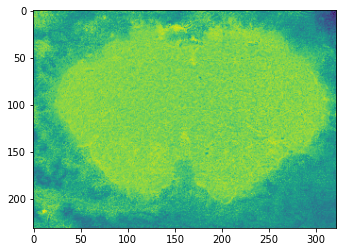

In [8]:
image = spectra.compute_image_using_index_lookup(
    400,
    900.5,
    data.get_array_spectra(slice_index=1),
    data.get_array_lookup_pixels(slice_index=1),
    data.get_image_shape(slice_index=1),
    data.get_array_lookup_mz(slice_index=1),
    data.get_divider_lookup(slice_index=1),
)
image = image  # /currentSlice.image_norm
plt.imshow(image)
plt.show()



#### Compare with and without lookup table for mz between 560 and 800

Start with easy cases

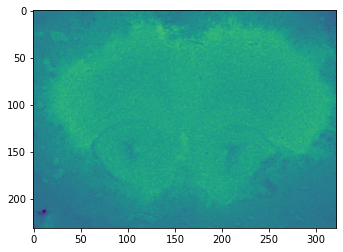

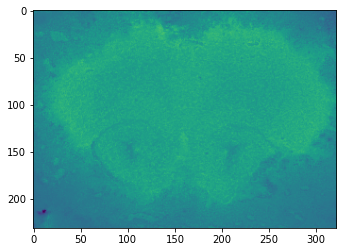

0.00048993155


In [9]:
# Need to normalize the cumulated lookup table by the sum #! this will change next time I update the dataset
image_1 = (
    data.get_cumulated_lookup_mz_image(slice_index=1, index=800)
    - data.get_cumulated_lookup_mz_image(slice_index=1, index=560)
) / data.get_cumulated_lookup_mz_image(slice_index=1, index=1400)
plt.imshow(image_1)
plt.show()

image_2 = spectra.compute_image_using_index_lookup(
    560,
    800,
    data.get_array_spectra(slice_index=1),
    data.get_array_lookup_pixels(slice_index=1),
    data.get_image_shape(slice_index=1),
    data.get_array_lookup_mz(slice_index=1),
    data.get_divider_lookup(slice_index=1),
)
image_2 = image_2
plt.imshow(image_2)
plt.show()
print(np.sum(image_1 - image_2))



More complex (and hopefully faster) function

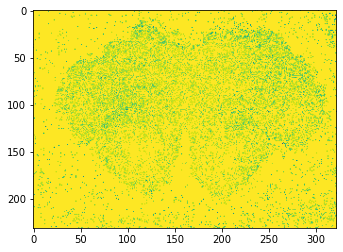

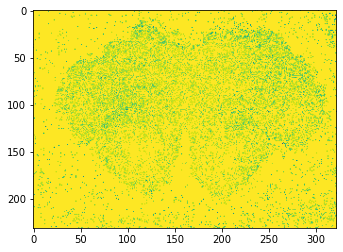

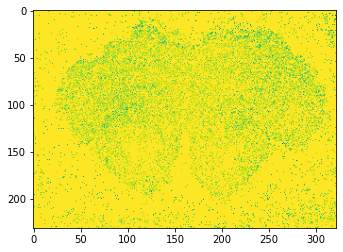

0.0
0.0005302429


In [11]:
image_1 = spectra.compute_image_using_index_and_image_lookup(
    254.9,
    1200.1,
    data.get_array_spectra(slice_index=1),
    data.get_array_lookup_pixels(slice_index=1),
    data.get_image_shape(slice_index=1),
    data.get_array_lookup_mz(slice_index=1),
    data.get_array_cumulated_lookup_mz_image(slice_index=1),
    data.get_divider_lookup(slice_index=1),
    True,
)
plt.imshow(image_1)
plt.show()

image_2 = spectra.compute_image_using_index_and_image_lookup(
    254.9,
    1200.1,
    data.get_array_spectra(slice_index=1),
    data.get_array_lookup_pixels(slice_index=1),
    data.get_image_shape(slice_index=1),
    data.get_array_lookup_mz(slice_index=1),
    data.get_array_cumulated_lookup_mz_image(slice_index=1),
    data.get_divider_lookup(slice_index=1),
    False,
)
plt.imshow(image_2)
plt.show()


image_3 = spectra.compute_image_using_index_lookup(
    254.9,
    1200.1,
    data.get_array_spectra(slice_index=1),
    data.get_array_lookup_pixels(slice_index=1),
    data.get_image_shape(slice_index=1),
    data.get_array_lookup_mz(slice_index=1),
    data.get_divider_lookup(slice_index=1),
)
plt.imshow(image_3)
plt.show()

print(np.sum(image_1 - image_2))
print(np.sum(image_3 - image_2))



### Low and high resolution averaged spectra

Plot the low resolution spectrum (the high-resolution one is too big to be plotted)

In [10]:
### CHECK THAT THIS WORKS NEXT ITERATION OF THE DATASET
array_avg_spectrum = data.get_array_avg_spectrum_downsampled(slice_index = 1)
fig = go.Figure([go.Scattergl(x=array_avg_spectrum[0,:], y=array_avg_spectrum[1,:])], )
fig.show(config=dict(displayModeBar=False))

[[4.0100000e+02 7.0290001e+01]
 [8.4995586e-01 1.5004413e-01]]


Check that the function supposed to return the correct index boundaries on Dash works

In [17]:
### CHECK THAT THIS BECOMES CORRECT NEXT ITERATION
array_avg = data.get_array_avg_spectrum(slice_index=1)
index_low_bound, index_high_bound = spectra.compute_index_boundaries(
    854.56, 858.32, array_spectra_avg=array_avg, lookup_table=data.get_array_lookup_mz_avg(slice_index=1)
)
# index_low_bound, index_high_bound = spectra.compute_index_boundaries_nolookup(854.56, 858.32, array_spectra_avg = array_avg)

print(array_avg[0, index_low_bound - 1])
print(array_avg[0, index_low_bound])
print(array_avg[0, index_low_bound + 1])
print()
print(array_avg[0, index_high_bound - 1])
print(array_avg[0, index_high_bound])
print(array_avg[0, index_high_bound + 1])


835.13544
835.1355
835.1355

838.14813
838.1482
838.14825


### Per pixel spectra

In [23]:
test = spectra.return_spectrum_per_pixel(
    1071, data.get_array_spectra(slice_index=1), data.get_array_lookup_pixels(slice_index=1)
)
fig = go.Figure([go.Scattergl(x=test[0], y=test[1])],)
fig.show(config=dict(displayModeBar=False))


(2, 1356)
0.01


In [24]:
test = spectra.compute_zeros_extended_spectrum_per_pixel(
    1071, data.get_array_spectra(slice_index=1), data.get_array_lookup_pixels(slice_index=1)
)
fig = go.Figure([go.Scattergl(x=test[0], y=test[1])])
fig.show(config=dict(displayModeBar=False))


(2, 4066)
0.03


## Match array to high-dimensional one

In [27]:
# Compute sum of spectra over all slices
spectrum_sum = spectra.convert_array_to_fine_grained(data.get_array_spectra(slice_index=1), 10**-4, lb = 350, hb = 1250 )
spectrum_sum[1,:]+=1 # To divide afterwards

# Then compute the spectrum of a given pixel relative to this sum
idx_pix = 32350
spectrum = np.array(data.get_array_spectra(slice_index=1)[:,data.get_array_lookup_pixels(slice_index=1)[idx_pix,0]:data.get_array_lookup_pixels(slice_index=1)[idx_pix,1]+1])
spectrum[:,1] = spectrum[:,1]/np.sum(spectrum[:,1])
spectrum_hd = spectra.convert_array_to_fine_grained(spectrum, 10**-4, lb = 350, hb = 1250 )
spectrum_hd[1,:] = spectrum_hd[1,:]/spectrum_sum[1,:]
spectrum_856 = spectra.strip_zeros(spectrum_hd)
spectrum_856, _ = spectra.add_zeros_to_spectrum(spectrum_856)

#do another one
idx_pix = 48450
spectrum = np.array(data.get_array_spectra(slice_index=1)[:,data.get_array_lookup_pixels(slice_index=1)[idx_pix,0]:data.get_array_lookup_pixels(slice_index=1)[idx_pix,1]+1])
spectrum[:,1] = spectrum[:,1]/np.sum(spectrum[:,1])
spectrum_hd = spectra.convert_array_to_fine_grained(spectrum, 10**-4, lb = 350, hb = 1250 )
spectrum_hd[1,:] = spectrum_hd[1,:]/spectrum_sum[1,:]
spectrum_1056 = spectra.strip_zeros(spectrum_hd)
spectrum_1056, _ = spectra.add_zeros_to_spectrum(spectrum_1056)

# Plot
fig = go.Figure([go.Scattergl(x=spectrum_856[0,:], y=spectrum_856[1,:]), go.Scattergl(x=spectrum_1056[0,:], y=spectrum_1056[1,:])], )
fig.show(config=dict(displayModeBar=False))
